In [1]:
import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
import models

In [2]:
lags1 = [1,2,3,4,5,6,7]
lags2 = [1,2,3]

ipca = models.predict_ipca(True,lags1)
cambio = models.predict_cambio(True,lags1)
selic = models.predict_selic(True,lags1)
gsf = models.predict_gsf(True,lags2)

In [3]:
for i in lags1:
    ipca[i]['res'] = ipca[i]['prediction'] - ipca[i]['indice']
    cambio[i]['res'] = cambio[i]['prediction'] - cambio[i]['cambio']
    selic[i]['res'] = selic[i]['prediction'] - selic[i]['selic']
for i in lags2:
    gsf[i]['res'] = gsf[i]['prediction'] - gsf[i]['gsf']

## IPCA

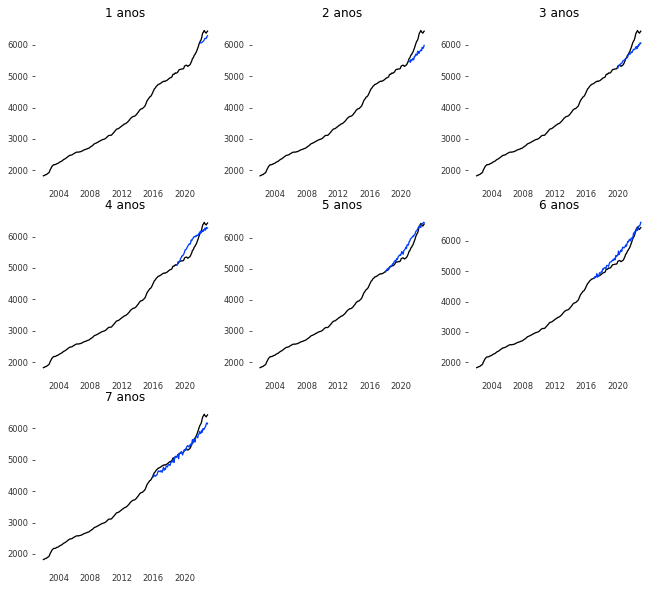

In [7]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    _ = plt.plot(ipca[i].index,ipca[i]['indice'])
    _ = plt.plot(ipca[i].index,ipca[i]['prediction'])
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

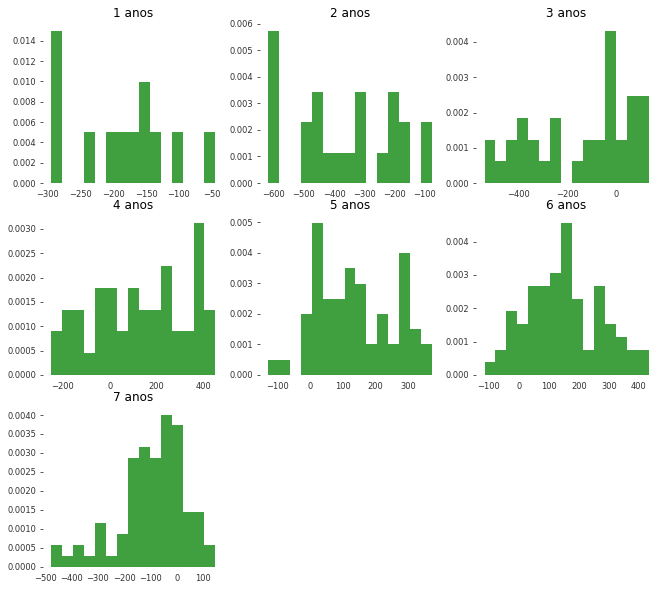

In [8]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    _ = plt.hist(ipca[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

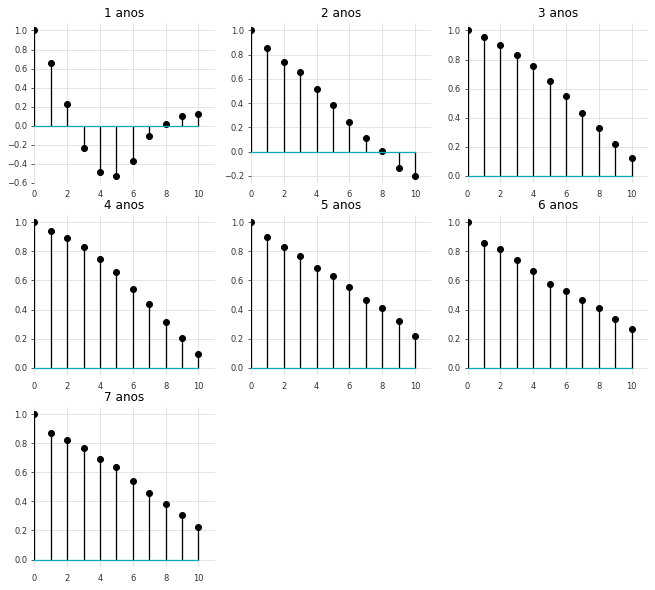

In [9]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    autocorr = acf(ipca[i]['res'].dropna(),nlags = 10)
    lg = range(0,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

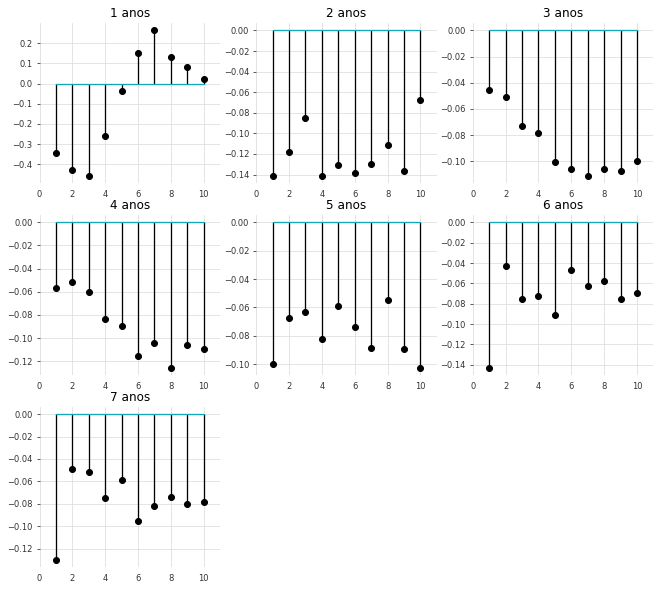

In [10]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(ipca[i]['res'].dropna(),nlags = 10))
    lg = range(1,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

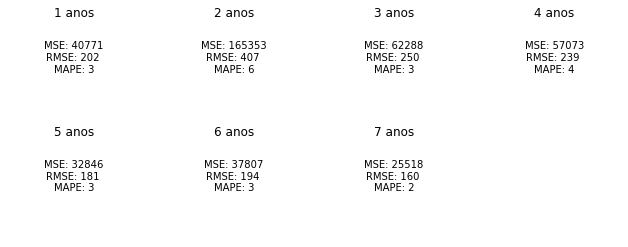

In [11]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags1:
    data = ipca[i].dropna()
    mse = round(mean_squared_error(data['indice'],data['prediction']))
    rmse = round(mean_squared_error(data['indice'],data['prediction'],squared = False))
    mape = round(np.mean(np.abs((data['indice']- data['prediction'])/data['indice']))*100)
    plt.subplot(2,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse} \nMAPE: {mape}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()

## Câmbio

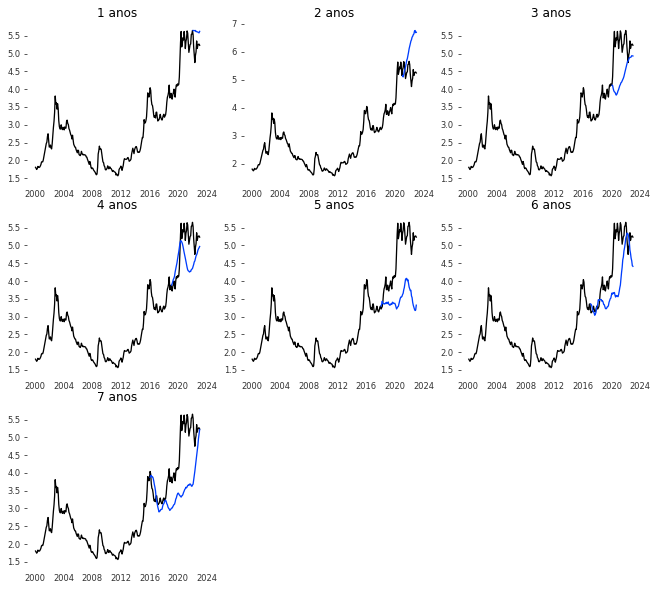

In [12]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    _ = plt.plot(cambio[i].index,cambio[i]['cambio'])
    _ = plt.plot(cambio[i].index,cambio[i]['prediction'])
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

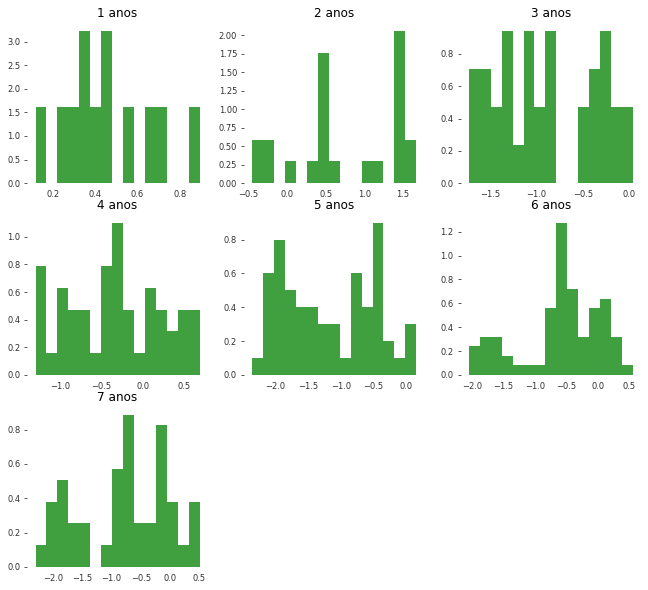

In [13]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    n, bins, patches = plt.hist(cambio[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

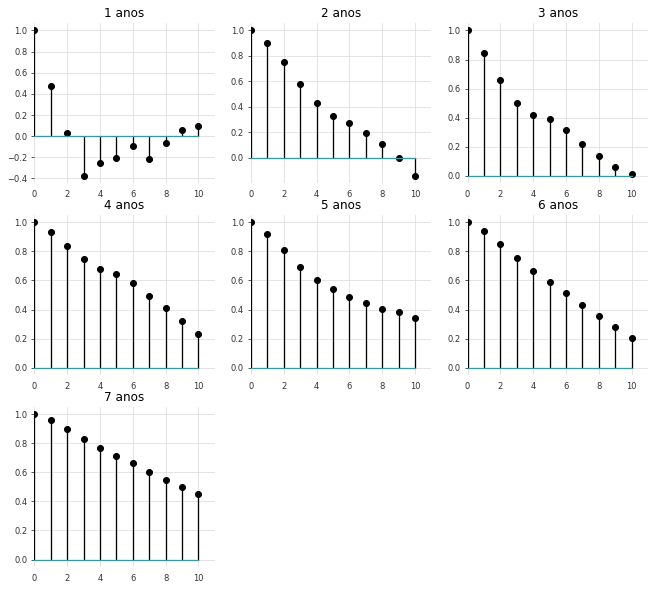

In [14]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    autocorr = acf(cambio[i]['res'].dropna(),nlags = 10)
    lg = range(0,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

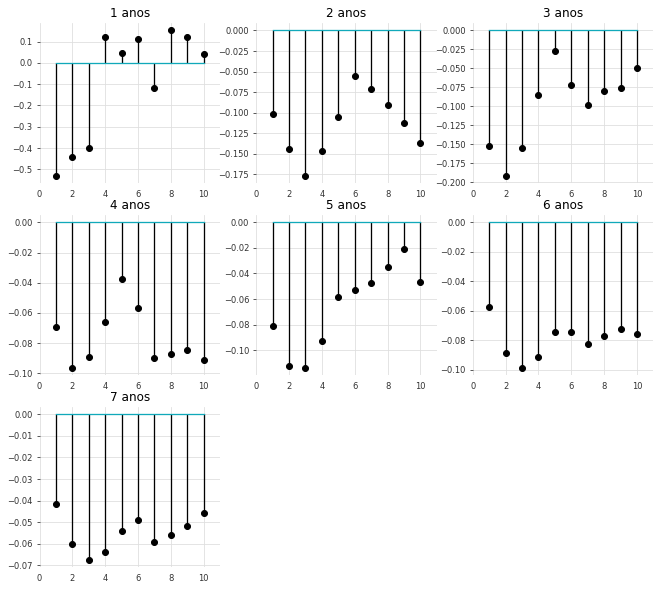

In [15]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(cambio[i]['res'].dropna(),nlags = 10))
    lg = range(1,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

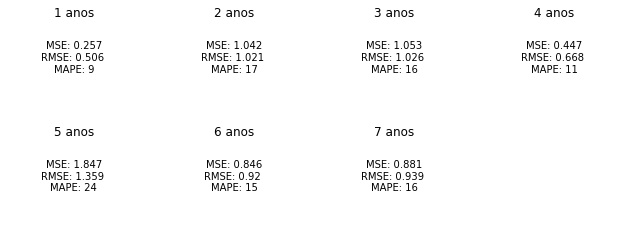

In [16]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags1:
    data = cambio[i].dropna()
    mse = round(mean_squared_error(data['cambio'],data['prediction']),3)
    rmse = round(mean_squared_error(data['cambio'],data['prediction'],squared = False),3)
    mape = round(np.mean(np.abs((data['cambio']- data['prediction'])/data['cambio']))*100)
    plt.subplot(2,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse} \nMAPE: {mape}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()

## CDI

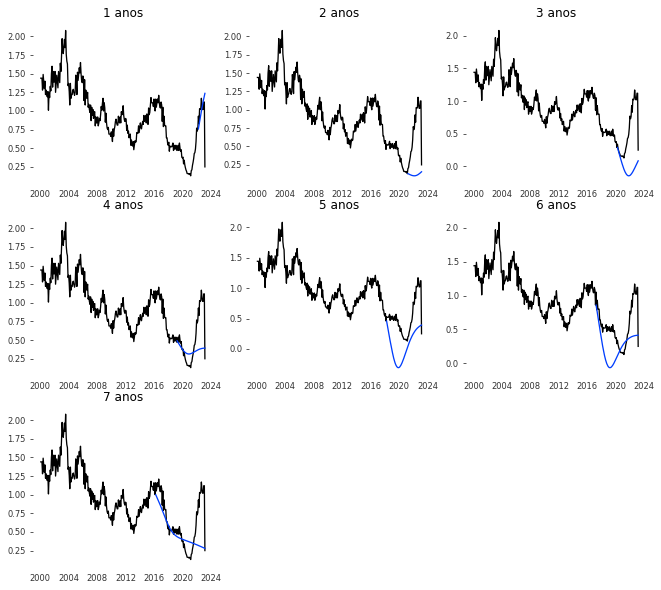

In [4]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    _ = plt.plot(selic[i].index,selic[i]['selic'])
    _ = plt.plot(selic[i].index,selic[i]['prediction'])
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

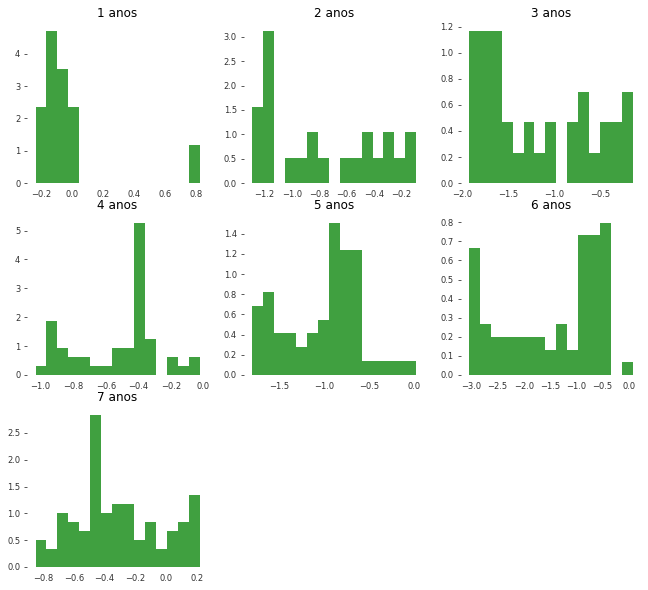

In [18]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    n, bins, patches = plt.hist(selic[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

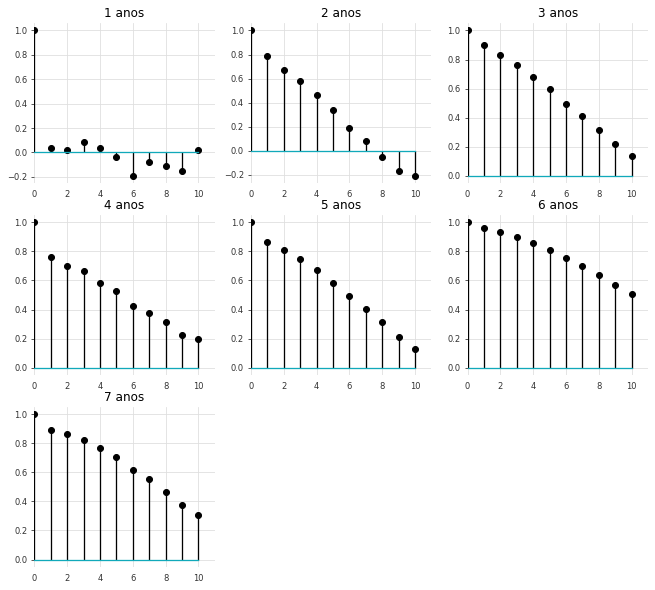

In [19]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    autocorr = acf(selic[i]['res'].dropna(),nlags = 10)
    lg = range(0,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

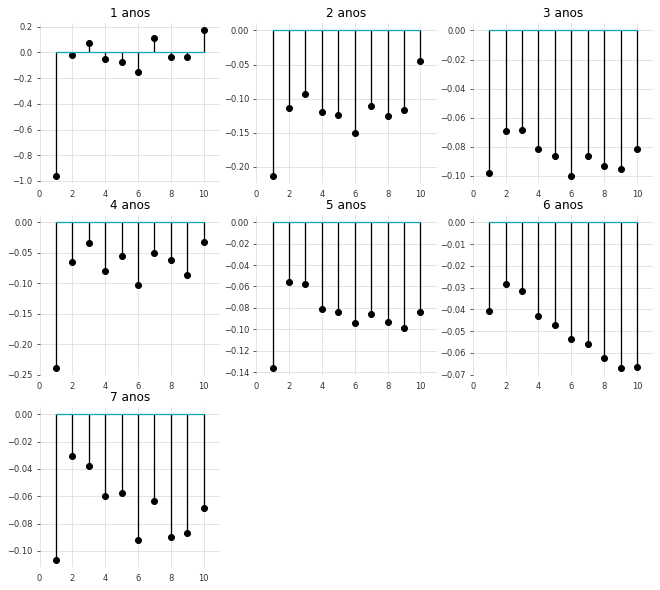

In [20]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags1:
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(selic[i]['res'].dropna(),nlags = 10))
    lg = range(1,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

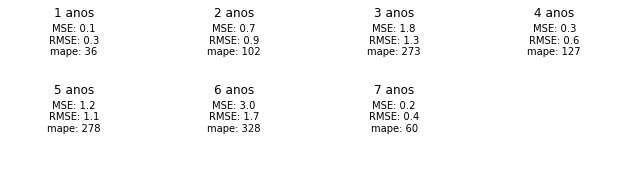

In [21]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags1:
    data = selic[i].dropna()
    mse = round(mean_squared_error(data['selic'],data['prediction']),1)
    rmse = round(mean_squared_error(data['selic'],data['prediction'],squared = False),1)
    mape = round(np.mean(np.abs((data['selic'] - data['prediction'])/data['selic']))*100)
    plt.subplot(3,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse}\nmape: {mape}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()

## Produção de Energia

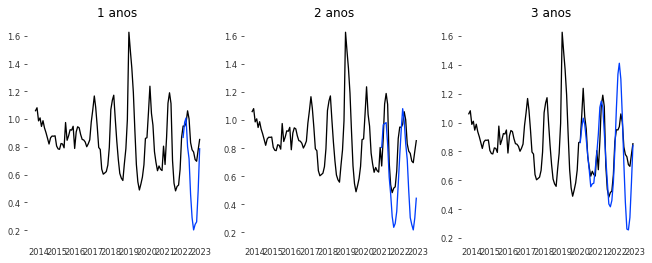

In [32]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags2:
    plt.subplot(1,3,i)
    _ = plt.plot(gsf[i].index,gsf[i]['gsf'])
    _ = plt.plot(gsf[i].index,gsf[i]['prediction'])
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

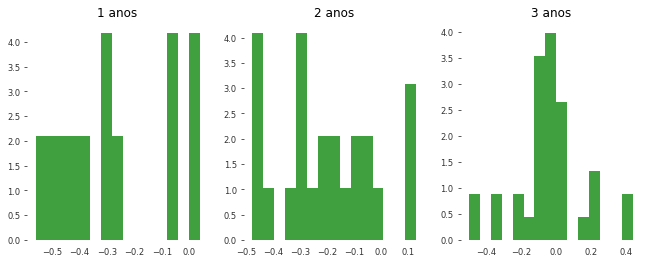

In [31]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags2:
    plt.subplot(1,3,i)
    n, bins, patches = plt.hist(gsf[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

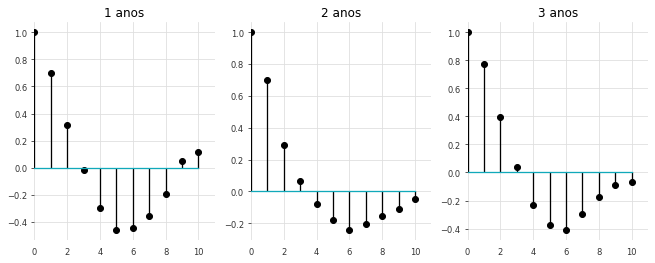

In [30]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags2:
    plt.subplot(1,3,i)
    autocorr = acf(gsf[i]['res'].dropna(),nlags = 10)
    lg = range(0,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

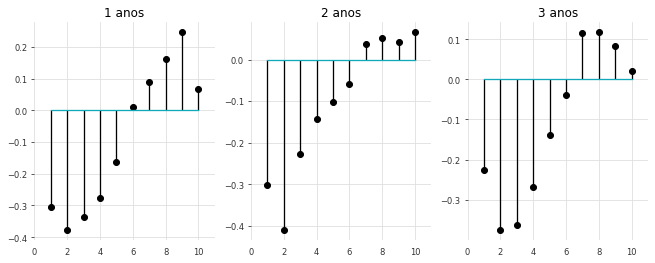

In [29]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags2:
    plt.subplot(1,3,i)
    autocorr = np.diff(acf(gsf[i]['res'].dropna(),nlags = 10))
    lg = range(1,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

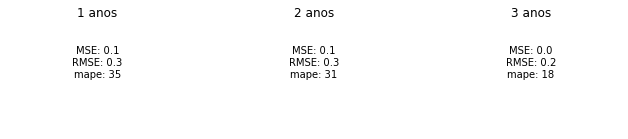

In [28]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(2)
for i in lags2:
    data = gsf[i].dropna()
    mse = round(mean_squared_error(data['gsf'],data['prediction']),1)
    rmse = round(mean_squared_error(data['gsf'],data['prediction'],squared = False),1)
    mape = round(np.mean(np.abs((data['gsf'] - data['prediction'])/data['gsf']))*100)
    plt.subplot(1,3,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse}\nmape: {mape}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()